## Data Exploration Notebook

This assignment was a part of a Udemy self driving car course. The aim is to build an image classifier that would classify traffic signs - as a self driving car would when it sees one.

This notebook explores the 3 different datasets for training, validation and testing. 

In [1]:
import pickle
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from data_preprocessing import *

%matplotlib inline

In [2]:
f = open("./configs.json", 'r')
configs = json.load(f)

In [3]:
data_path = configs['data_path']
num_classes = configs['num_classes']

## Read the data

- The image data is stoored in pickle files - retaining the datatype
- We check the shape of the dataset and we find that:
    - The train set contains 34,799 images 
    - The validation set contains 4410 images
    - The test set contains 12,630 images
    - All the images are of size 32 x 32 x 3 - RGB image as it has 3 color channels

In [4]:
with open(os.path.join(data_path, 'train.p'), 'rb') as f:
    train_set = pickle.load(f)

with open(os.path.join(data_path, 'valid.p'), 'rb') as f:
    validation_set = pickle.load(f)

with open(os.path.join(data_path, 'test.p'), 'rb') as f:
    test_set = pickle.load(f)

#They are all dictionary formats

x_train, y_train = train_set['features'], train_set['labels']
x_val, y_val = validation_set['features'], validation_set['labels']
x_test, y_test = test_set['features'], test_set['labels']

In [5]:
print('Training data shape: ', x_train.shape)
print('Validation data shape: ', x_val.shape)
print('Test data shape: ', x_test.shape)

Training data shape:  (34799, 32, 32, 3)
Validation data shape:  (4410, 32, 32, 3)
Test data shape:  (12630, 32, 32, 3)


## Decyphering class mappings

- If we look at the train set, the classes are denoted by numbers 1-43
- We use the signnames.csv file to map each class number to a class name

First 5 elements
    ClassId              SignName
0        0  Speed limit (20km/h)
1        1  Speed limit (30km/h)
2        2  Speed limit (50km/h)
3        3  Speed limit (60km/h)
4        4  Speed limit (70km/h)


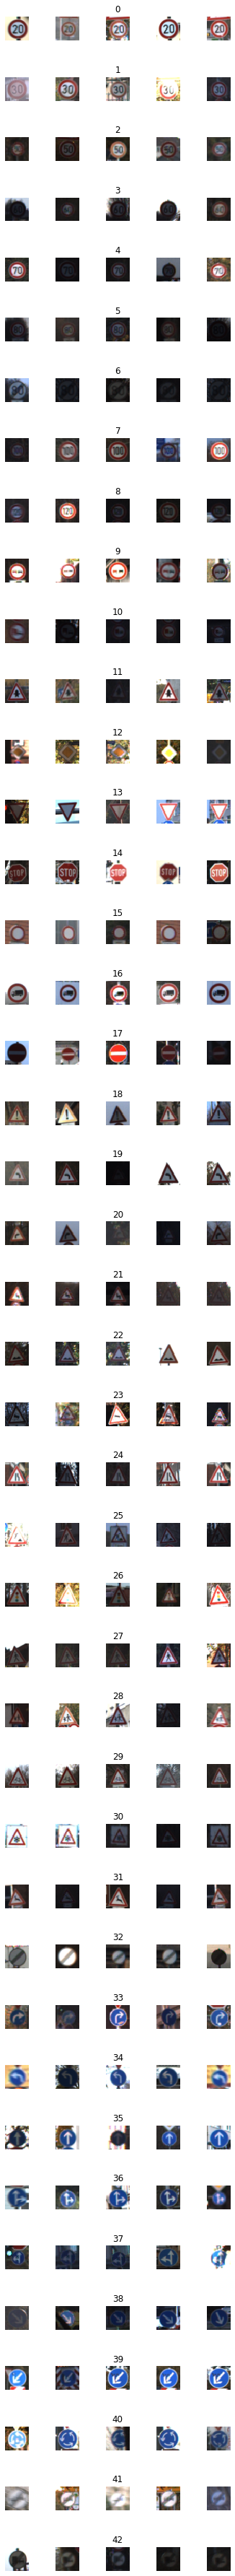

In [6]:
data = pd.read_csv(os.path.join(data_path, 'signnames.csv'))
print('First 5 elements\n', data.head())

#Show the data

num_samples = []
cols = 5
num_classes = 43

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
        x_selected = x_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected)-1)), :, :], cmap=plt.get_cmap('gray'))
        axs[j][i].axis('off')
        if i == 2:
            axs[j][i].set_title(str(j))
            num_samples.append(len(x_selected))

## Class Distribution

- This cell visualizes the number of samples for a given class
- Although there seems to be some imbalance in classes, I haven't done data augmentation
- Data augmentation has the potential to improve model performance and make it generalize better

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


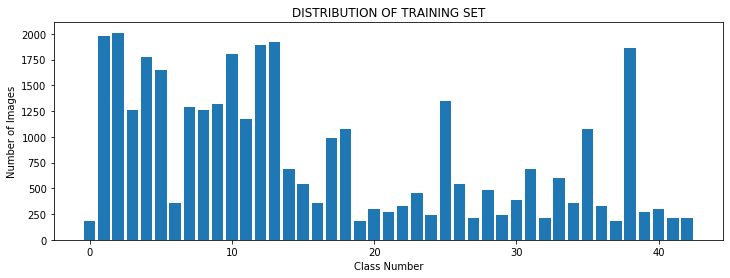

In [7]:
print(num_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0, num_classes), num_samples)
plt.title('DISTRIBUTION OF TRAINING SET')
plt.xlabel('Class Number')
plt.ylabel('Number of Images')
plt.show()

## Data Preprocessing Steps

- We change the original RGB image into a grayscale image
- We then equalize and normalize the grayscale image and use that to train the classifier

31


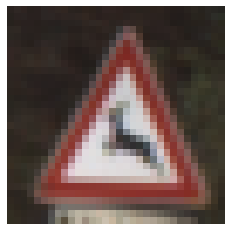

In [8]:
# Open sample image

plt.imshow(x_train[500])
plt.axis('off')
print(y_train[500])

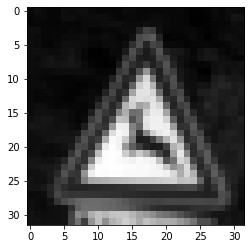

In [9]:
gray = to_gray(x_train[500])
plt.imshow(gray, cmap='gray')

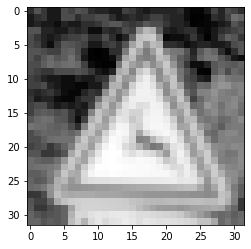

In [10]:
equalized = equalize(gray)
plt.imshow(equalized, cmap='gray')